## <font color=grey> Machine Learning 1 - Module 2 - Multi-Linear Regression: Bike Sharing Assignment
> <font color=blue> By Sankalp Gupta

#### <font color=blue> Step 1: </font> Import all the required libraries

In [1]:
#1. Libraries for data processing
import pandas as pd
import numpy as np

#2. Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#3. Modules for modelling: from statsmodels library
import statsmodels.api as sm_api
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

import scipy.stats as stats

#4. Modules for modelling: sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import sys
print("Python version: {}".format(sys.version))

print ("Pandas version: {}".format(pd.__version__))
print ("NumPy version: {}".format(np.__version__))

import matplotlib
print ("Matplotlib version: {}".format(matplotlib.__version__))

print ("Seaborn version: {}".format(sns.__version__))

import statsmodels
print ("Statsmodels version: {}".format(statsmodels.__version__))

import scipy
print ("Scipy version: {}".format(scipy.__version__))

import sklearn
print ("Sklearn version: {}".format(sklearn.__version__))

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.3.4
NumPy version: 1.20.3
Matplotlib version: 3.4.3
Seaborn version: 0.11.2
Statsmodels version: 0.12.2
Scipy version: 1.7.1
Sklearn version: 0.24.2


In [3]:
import warnings
warnings.filterwarnings ('ignore')

#### <font color=blue> Step 2: </font> Read datafile using pandas library and load it into a pandas DataFrame

In [4]:
bike_data = pd.read_csv('day.csv')

In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_data['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

<font color=red> Observation: </font> There are exactly 365 records per year, for 2 years: one for each day 

#### <font color=blue> Step 3: </font> Manipulate Data to make it more useful

#### <font color=green> Step 3.1: </font> Create derived column and drop unnecessary columns

In [9]:
#The column named instant is just an index, so it will be of no use in analysis
#The column named dteday contains date, which too is not needed, as the year, month, weekday are already there in other columns
#However, we will not drop them, we will just ignore them in future analysis
#bike_data.drop (columns=['instant', 'dteday'], axis=1, inplace=True)

In [10]:
#The column registerd, casual and cnt are inter-dependent. Its better to have a column of % of users instead
#The data in these columns is not useful for any predictions, but it can be used for a better understanding of the business
bike_data ['reg_percent'] = 100 * bike_data ['registered'] / bike_data ['cnt']
bike_data ['casual_percent'] = 100 * bike_data ['casual'] / bike_data ['cnt']

#### <font color=green> Step 3.2: </font> Round off float numbers to 2 decimal places

In [11]:
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed', 'reg_percent', 'casual_percent']

In [12]:
bike_data [numeric_vars] = round (bike_data [numeric_vars], 2)

#### <font color=green> Step 3.3: </font> Change categorical columns to strings to make them more readable

In [13]:
cat_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

In [14]:
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_data ['season'] = bike_data ['season'].apply (lambda x: seasons[x])

In [15]:
years = {0:2018, 1:2019}
bike_data ['yr'] = bike_data ['yr'].apply (lambda x: years[x])

In [16]:
yes_no = {0:'no', 1:'yes'}
bike_data ['holiday'] = bike_data ['holiday'].apply (lambda x: yes_no[x])
bike_data ['workingday'] = bike_data ['workingday'].apply (lambda x: yes_no[x])

In [17]:
weathersit = {1:'clear', 2:'misty', 3:'light snow', 4:'heavy snow'}
bike_data ['weathersit'] = bike_data ['weathersit'].apply (lambda x: weathersit[x])

In [18]:
import calendar 
bike_data ['mnth'] = bike_data ['mnth'].apply (lambda x: calendar.month_abbr[x])

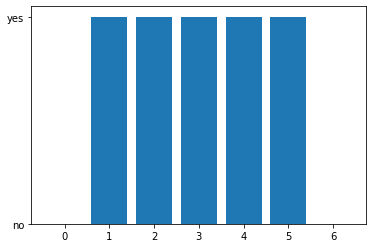

In [19]:
#Check whether the first day is Sunday or Monday
plt.bar (bike_data['weekday'], bike_data['workingday'])
plt.show()

In [20]:
weekdays = list (calendar.day_abbr)
weekdays

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [21]:
#weekdays[0] is Monday, whereas weekday=0 in dataset is Sunday, as is evident from above plot
#Hence, switch Monday and Sunday
weekdays.insert(0, weekdays.pop(-1))
weekdays

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [22]:
bike_data ['weekday'] = bike_data ['weekday'].apply (lambda x: weekdays[x])

In [23]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,reg_percent,casual_percent
0,1,01-01-2018,spring,2018,Jan,no,Sat,no,misty,14.11,18.18,80.58,10.75,331,654,985,66.40,33.60
1,2,02-01-2018,spring,2018,Jan,no,Sun,no,misty,14.90,17.69,69.61,16.65,131,670,801,83.65,16.35
2,3,03-01-2018,spring,2018,Jan,no,Mon,yes,clear,8.05,9.47,43.73,16.64,120,1229,1349,91.10,8.90
3,4,04-01-2018,spring,2018,Jan,no,Tue,yes,clear,8.20,10.61,59.04,10.74,108,1454,1562,93.09,6.91
4,5,05-01-2018,spring,2018,Jan,no,Wed,yes,clear,9.31,11.46,43.70,12.52,82,1518,1600,94.88,5.12


#### <font color=blue> Step 4: </font> Visualise data

#### <font color=green> Step 4.1: </font> Pair plots of numeric data and target variable

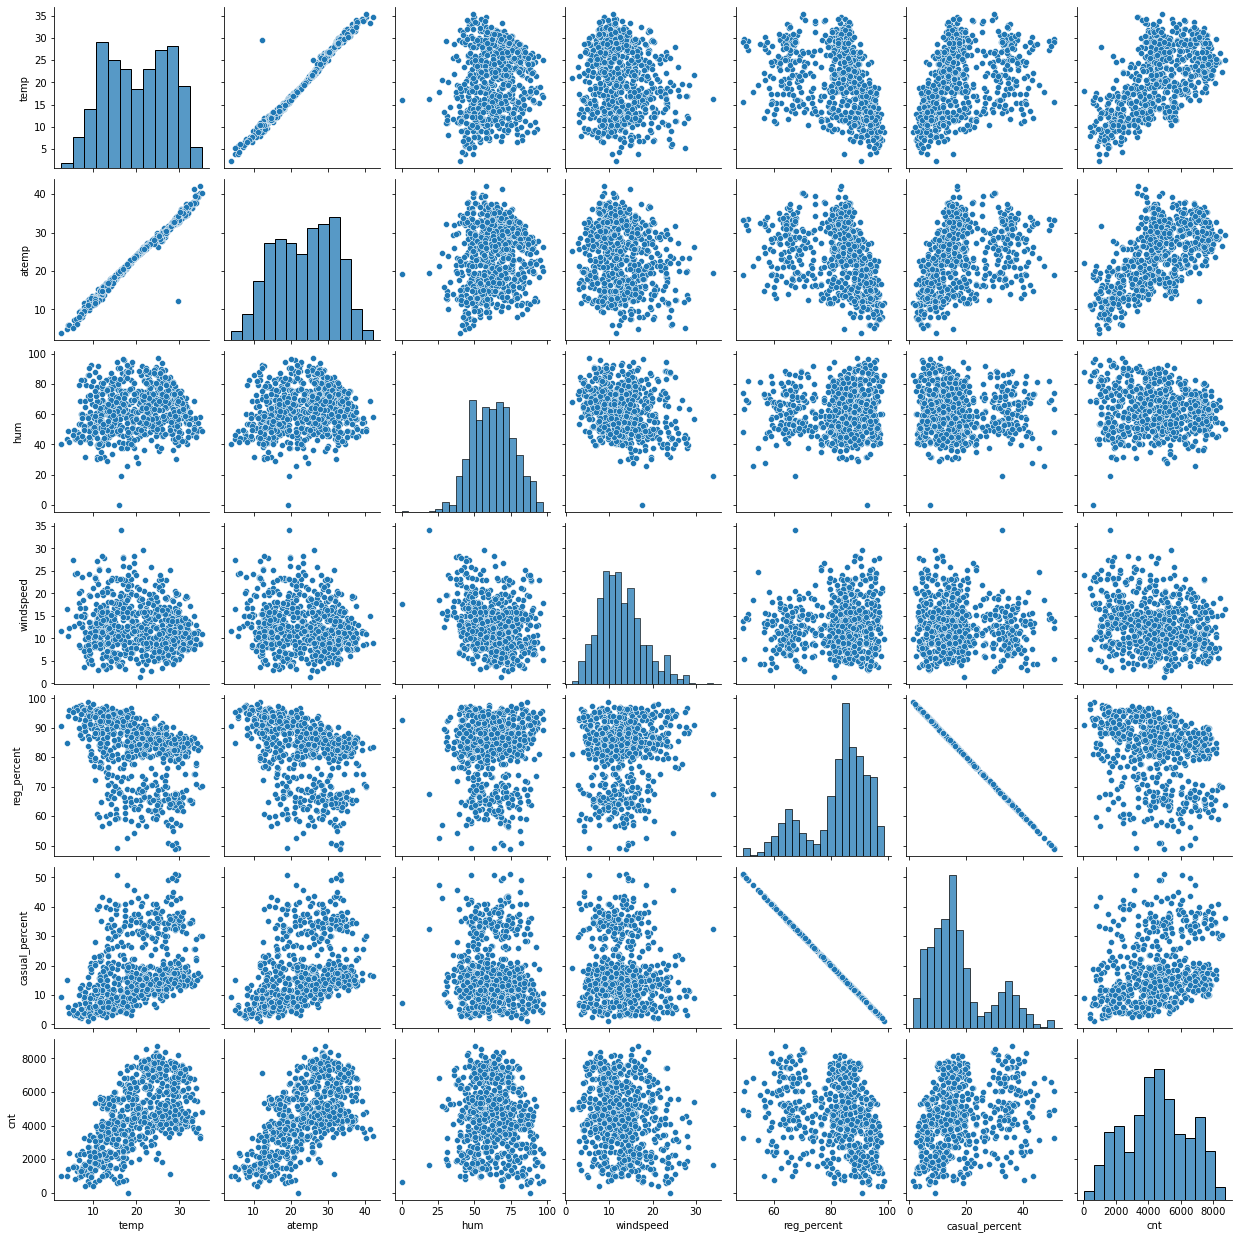

In [24]:
sns.pairplot (bike_data[numeric_vars + ['cnt']])
plt.show()

<font color=red> Observations: </font> 
> 1. Rentals and temp/atemp show a strong positive linear relationship, whereas others do not indicate any relationship at first glance
> 2. temp and atemp show a very high correlation. Not only that, their values are also almost same. Hence, it is better to use temp instead of atemp, as temp can be predicted and hence usable by the bike rental company to predict customer demand.
> 3. Humidity, wind-speed do not seem significant
> 4. Registration-percentage / casual-percentage seem to have some linear relationship with cnt.
> 5. Registration-percentage has a -ve relationship with cnt and casual-percentage has a +ve relationship

In [25]:
#The temp and atemp columns are very closely correlated and only one of them is required for analysis
#Both feeling temperature as well as actual temperature can be predicted based on weather forecasts
#So its better to use atemp for analysis. We will not drop temp, we will just ignore it in future analysis
#bike_data.drop (columns='temp', axis=1, inplace=True)
#numeric_vars.remove ('temp')

#### <font color=green> Step 4.2: </font> Visualize Registerd vs Casual users

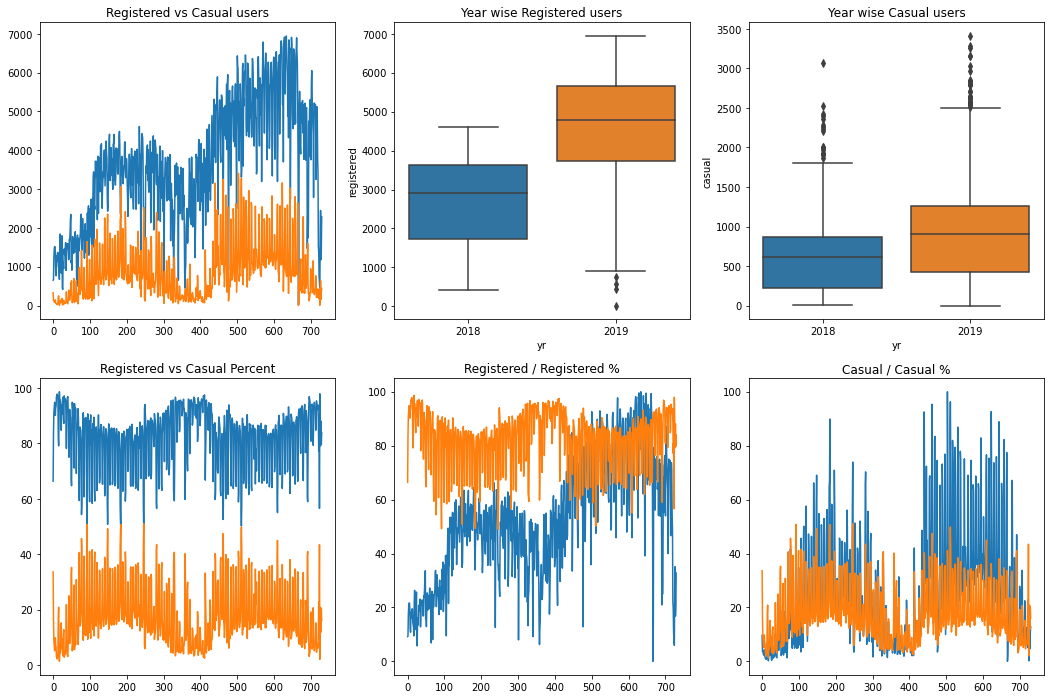

In [26]:
#Further analysis on registered / casual rentals 
#Breakup (registered vs casual users) of Time series trend of the rentals from first day to last day
plt.figure (figsize=(18,12))

#1. Line graph comparing daily registered vs casual users
ax1 = plt.subplot (2,3,1)
bike_data['registered'].plot.line()
bike_data['casual'].plot.line()
ax1.title.set_text('Registered vs Casual users')

#2. Box plot of year wise registered users
ax2 = plt.subplot (2,3,2)
sns.boxplot (x='yr', y='registered', data=bike_data)
ax2.title.set_text('Year wise Registered users')

#3. Box plot of year wise casual users
ax3 = plt.subplot (2,3,3)
sns.boxplot (x='yr', y='casual', data=bike_data)
ax3.title.set_text('Year wise Casual users')

#4. Line graph comparing daily registered % vs casual % users
ax4 = plt.subplot (2,3,4)
bike_data['reg_percent'].plot.line()
bike_data['casual_percent'].plot.line()
ax4.title.set_text('Registered vs Casual Percent')

#5. Registered user absolute numbers vs percentage of registered users over time
#Have to normalize the registered numbers so that the graph of both can be compared
ax5 = plt.subplot (2,3,5)
r_min = bike_data['registered'].min()
r_max = bike_data['registered'].max()
regs = 100* (bike_data['registered'] - r_min) / (r_max - r_min)
regs.plot.line()

bike_data['reg_percent'].plot.line()
ax5.title.set_text('Registered / Registered %')

#6. Casual user absolute numbers vs percentage of casual users over time
#Have to normalize the casual numbers so that the graph of both can be compared
ax6 = plt.subplot (2,3,6)
c_min = bike_data['casual'].min()
c_max = bike_data['casual'].max()
casuals = 100* (bike_data['casual'] - c_min) / (c_max - c_min)
casuals.plot.line()

bike_data['casual_percent'].plot.line()
ax6.title.set_text('Casual / Casual %')

plt.show()

<font color=red> Observations: </font>
> 1. Rentals increased year-on-year
> 2. Registered users have increased much more in 2nd year, as compared to casual users
> 3. During seasonal increases, the increase in casual users is more than the increase in registered users 

#### <font color=green> Step 4.3: </font> Box plots of categorical data against target variable

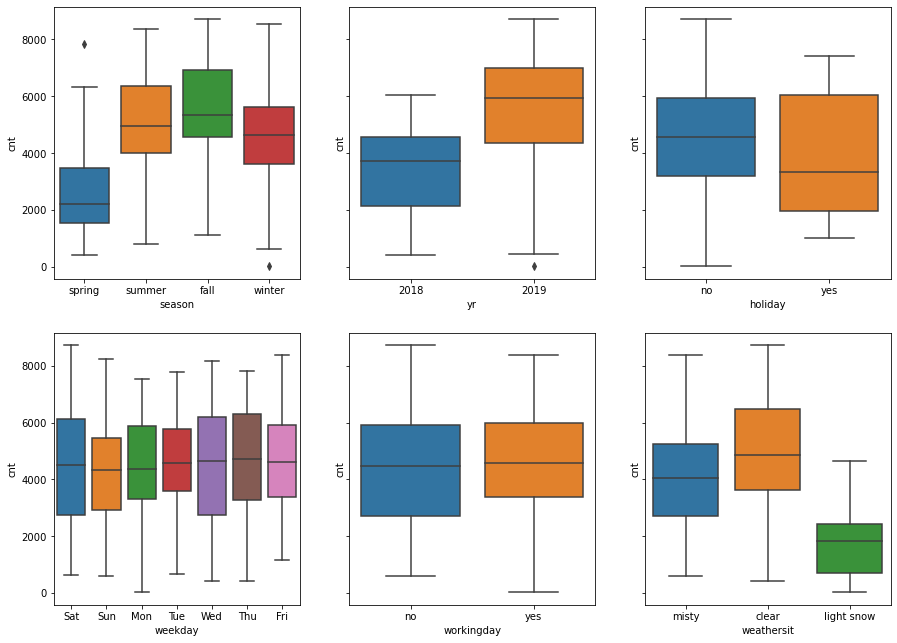

In [27]:
#Show box plots of all categorical variables except month. Month box plot will be displayed separately
fig, ax = plt.subplots (2, 3, sharey=True, figsize=(15,11))

l = len(cat_vars)

for i in range(l-1):
    plt.subplot (2,3,i+1)
    sns.boxplot (x=cat_vars[i], y='cnt', data=bike_data)

plt.show()

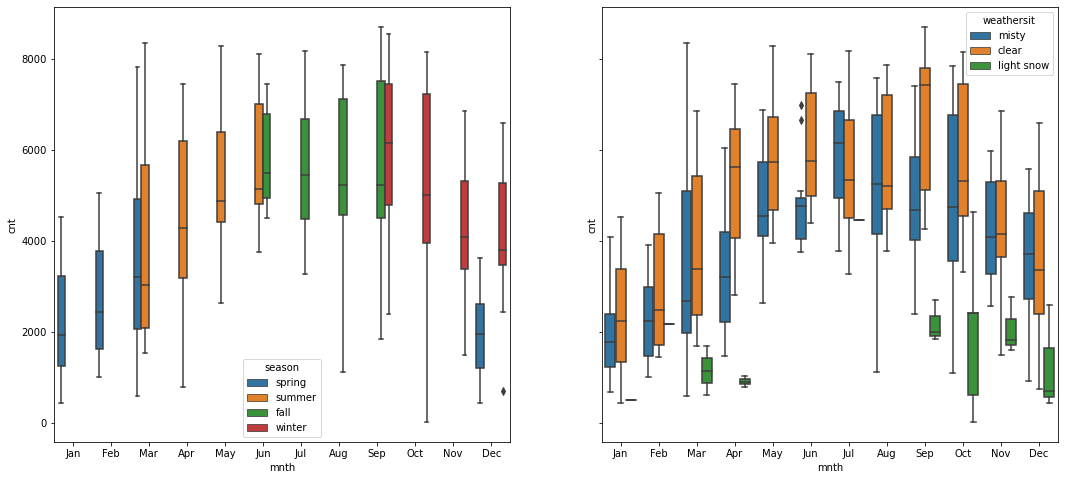

In [28]:
#Box plot for month
fig, ax = plt.subplots (1, 2, sharey=True, figsize=(18,8))

plt.subplot (1,2,1)
sns.boxplot (x='mnth', y='cnt', hue='season', data=bike_data)

plt.subplot (1,2,2)
sns.boxplot (x='mnth', y='cnt', hue='weathersit', data=bike_data)
plt.show()

#### <font color=green> Step 4.4: </font> Check temp/atemp correlation with mnth and season

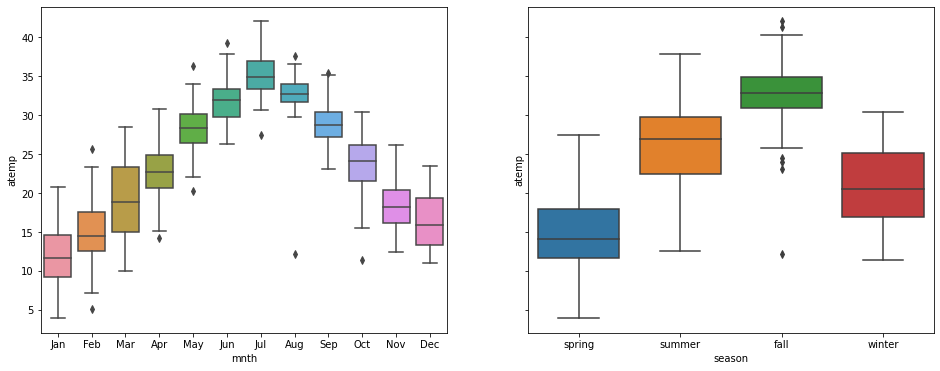

In [29]:
# Lets check season and temp correlation to check the above observation
fig, ax = plt.subplots (1, 2, sharey=True, figsize=(16,6))

plt.subplot (1,2,1)
sns.boxplot (x='mnth', y='atemp', data=bike_data)

plt.subplot (1,2,2)
sns.boxplot (x='season', y='atemp', data=bike_data)
plt.show()

<font color=red> Observations: </font>
> 1. There are higher rentals in fall/summer AND/OR higher temperatures AND/OR clear days AND/OR middle of the year
> 2. Year-on-year increase is significant
> 3. There are fewer rentals on holidays / non-working days / weekends
> 4. Seasons, Months, temperature and weather situation have a high correlation amongst each other

#### <font color=green> Step 4.5: Heatmap of correlation of numeric variables

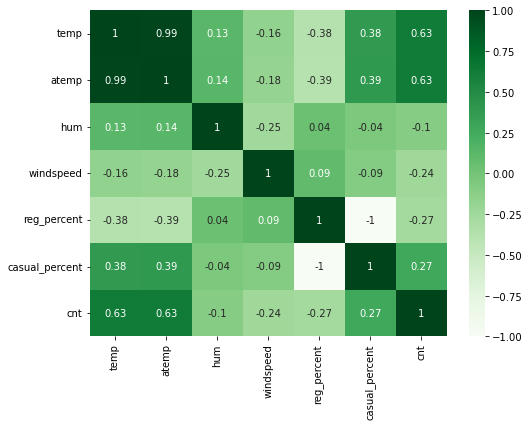

In [30]:
plt.figure (figsize=(8,6))
sns.heatmap (round(bike_data[numeric_vars + ['cnt']].corr(),2), cmap='Greens', annot=True)
plt.show()

<font color=red> Observations:
> 1. Rentals have the highest correlation with temp, yr, casual_percent and season
> 2. Casual_percent and Reg_percent are exactly oppositely correlated to each other, so one column can be dropped 
> 3. As expected earlier, atemp/temp are highly correlated, so its best to drop one of them

#### <font color=green> Step 4.6: Visualize the target variable, i.e., the rentals, against time

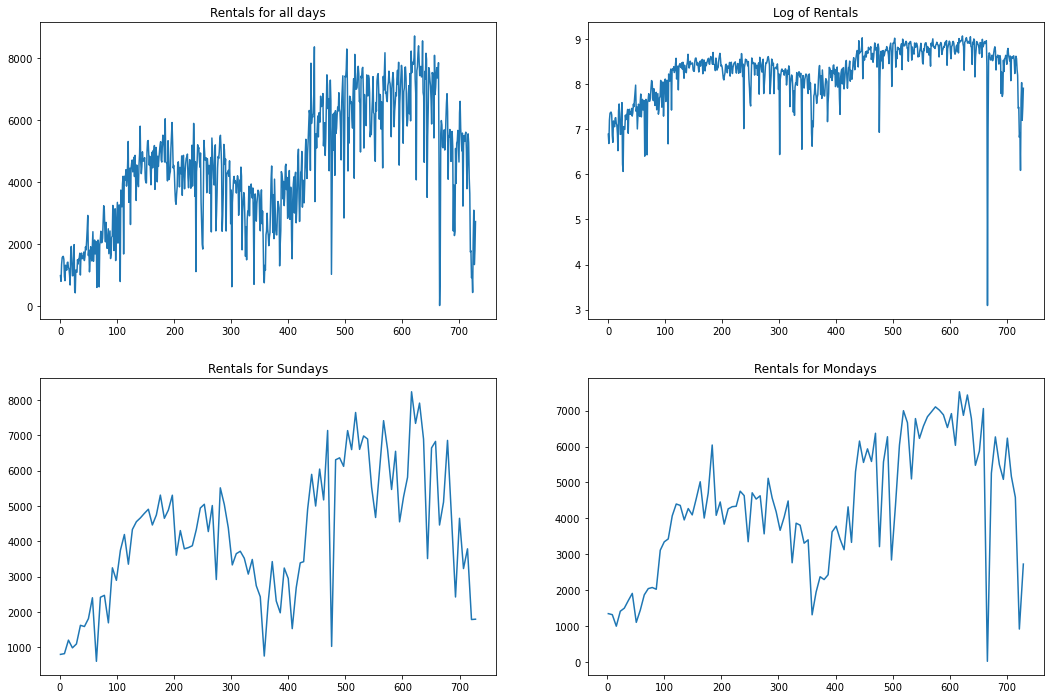

In [31]:
plt.figure (figsize=(18,12))

ax1 = plt.subplot (2,2,1)
bike_data['cnt'].plot.line()
ax1.title.set_text ('Rentals for all days')

ax2 = plt.subplot (2,2,2)
bike_data['Log_cnt'] = np.log (bike_data['cnt'])
bike_data['Log_cnt'].plot.line()
ax2.title.set_text ('Log of Rentals')

ax3 = plt.subplot (2,2,3)
bike_data['cnt'][bike_data['weekday']=='Sun'].plot.line()
ax3.title.set_text ('Rentals for Sundays')

ax4 = plt.subplot (2,2,4)
bike_data['cnt'][bike_data['weekday']=='Mon'].plot.line()
ax4.title.set_text ('Rentals for Mondays')

plt.show()

#### <font color=red> Observation:
> 1. Rentals are increasing year-on-year
> 2. Rentals peak during the middle of the year, each year.
> 3. Rental are low at the beginning and end of a year
> 4. The sharpl swings over short periods of time display weekly variations, which can be understood if only a single weekday's data is seen
> 5. The peaks can also be smoothed using a log curve

#### <font color=blue> Step 5: </font> Data preparation before modelling

#### <font color=green> Step 5.1: </font> Create dummy variables

In [32]:
def create_dummies (bike_data):
    #1. holiday
    bike_data ['holiday'] = bike_data ['holiday'].apply (lambda x: 0 if x=='no' else 1)

    #2. workingday
    bike_data ['workingday'] = bike_data ['workingday'].apply (lambda x: 0 if x=='no' else 1)

    #3. yr
    bike_data ['yr'] = bike_data ['yr'].apply (lambda x: 0 if x==2018 else 1)

    #2. season
    seasons = pd.get_dummies(bike_data['season'], drop_first=True)
    bike_data = pd.concat ([bike_data, seasons], axis=1)

    #3. weekday
    weekdays = pd.get_dummies(bike_data['weekday'], drop_first=True)
    bike_data = pd.concat ([bike_data, weekdays], axis=1)

    #4. weathersit
    weathersits = pd.get_dummies(bike_data['weathersit'], drop_first=True)
    bike_data = pd.concat ([bike_data, weathersits], axis=1)

    #5. mnth
    months = pd.get_dummies(bike_data['mnth'], drop_first=True)
    bike_data = pd.concat ([bike_data, months], axis=1)
    
    return bike_data

In [33]:
bike_data =  create_dummies (bike_data)

In [34]:
bike_data.shape

(730, 41)

In [35]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         730 non-null    int64  
 1   dteday          730 non-null    object 
 2   season          730 non-null    object 
 3   yr              730 non-null    int64  
 4   mnth            730 non-null    object 
 5   holiday         730 non-null    int64  
 6   weekday         730 non-null    object 
 7   workingday      730 non-null    int64  
 8   weathersit      730 non-null    object 
 9   temp            730 non-null    float64
 10  atemp           730 non-null    float64
 11  hum             730 non-null    float64
 12  windspeed       730 non-null    float64
 13  casual          730 non-null    int64  
 14  registered      730 non-null    int64  
 15  cnt             730 non-null    int64  
 16  reg_percent     730 non-null    float64
 17  casual_percent  730 non-null    flo

In [36]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,spring,0,Jan,0,Sat,0,misty,14.11,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,misty,14.90,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.05,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.20,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.31,...,0,0,1,0,0,0,0,0,0,0


#### <font color=green> Step 5.1: </font> Test-train-split

In [37]:
bike_train, bike_test = tts (bike_data, train_size=0.7, random_state=100)

In [38]:
bike_train.shape

(510, 41)

In [39]:
bike_test.shape

(220, 41)

#### <font color=green> Step 5.2: </font> Variable Rescaling - numerical variables only

In [40]:
sk_mms = MinMaxScaler()

#### <font color=green> Step 5.2.1: </font> First Training data - Do a Fit and Transform

In [41]:
scaled_cols = ['atemp', 'temp', 'hum', 'windspeed']

In [42]:
bike_train [scaled_cols] = sk_mms.fit_transform (bike_train[scaled_cols])

In [43]:
bike_train [scaled_cols] = bike_train [scaled_cols].round (2)

In [44]:
bike_train [scaled_cols].head()

,atemp,temp,hum,windspeed
576,0.77,0.82,0.73,0.26
426,0.44,0.44,0.64,0.26
728,0.20,0.25,0.50,0.66
482,0.39,0.40,0.50,0.19
111,0.32,0.35,0.75,0.38


In [45]:
bike_train [scaled_cols].describe()

,atemp,temp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513176,0.537529,0.650373,0.320941
std,0.212509,0.225686,0.145911,0.169750
min,0.000000,0.000000,0.000000,0.000000
25%,0.330000,0.340000,0.540000,0.200000
50%,0.530000,0.540000,0.650000,0.300000
75%,0.690000,0.740000,0.757500,0.410000
max,1.000000,1.000000,1.000000,1.000000


#### <font color=green> Step 4.2.2: </font> Now Test data separately - only Transform. Fit is done already

In [46]:
bike_test [scaled_cols] = sk_mms.transform (bike_test[scaled_cols])

In [47]:
bike_test [scaled_cols] = bike_test [scaled_cols].round (2)

In [48]:
bike_test [scaled_cols].describe()

,atemp,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000
mean,0.532818,0.558818,0.638091,0.313409
std,0.217731,0.233208,0.148555,0.159848
min,0.030000,0.050000,0.260000,-0.040000
25%,0.340000,0.357500,0.527500,0.200000
50%,0.545000,0.560000,0.625000,0.300000
75%,0.712500,0.755000,0.740000,0.400000
max,0.980000,0.980000,1.000000,0.810000


#### <font color=green> Step 4.3: </font> Set the X and Y variable

In [49]:
#cnt is the count of daily users / rentals. This is the target variable of interest to the customer
y_var = 'cnt'

In [50]:
#Since we have not dropped any columns, or popped out the target variable column,
#it is important to choose all the correct X variables

def init_X_vars ():
    #1. Make a list of all the features
    X_vars = list(bike_data.columns)

    #2. Remove the y_variable
    X_vars.remove ('cnt')
    X_vars.remove ('Log_cnt')

    #3. Discard instant and dteday, as they are not useful for analysis
    X_vars.remove ('instant')
    X_vars.remove ('dteday')

    #4. Discard temp, as only atemp will be used
    X_vars.remove ('temp')

    #5. Discard reg_percent, as only casual_percent will be used
    X_vars.remove ('reg_percent')

    #6. Discard registered and casual, as one derived column casual_percent is enough
    X_vars.remove ('registered')
    X_vars.remove ('casual')

    #7. Discard season, weekday, mnth and weathersit, as their dummy variables are being used instead
    X_vars.remove ('season')
    X_vars.remove ('weekday')
    X_vars.remove ('mnth')
    X_vars.remove ('weathersit')

    #8. Add a const at the beginning, as it will be added in the next step
    X_vars[:0] = ['const']
    
    return X_vars

In [65]:
X_vars = init_X_vars()

In [52]:
bike_train = sm_api.add_constant (bike_train, has_constant='add')

In [53]:
bike_train[X_vars].head()

,const,yr,holiday,workingday,atemp,hum,windspeed,casual_percent,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1.0,1,0,1,0.77,0.73,0.26,13.41,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.44,0.64,0.26,23.51,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.20,0.50,0.66,20.27,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.39,0.50,0.19,26.54,0,1,...,0,0,0,0,0,0,0,0,0,0
111,1.0,0,0,1,0.32,0.75,0.38,10.52,0,1,...,0,0,0,0,0,0,0,0,0,0


#### <font color=green> Step 4.4: </font> Create a dictionary to hold all the models

In [54]:
#Initiaize a dictionary to store all the models
models = {}

# The structure of the dictionary will be:
# 'Model-<num>':[adj-R2, {dictionary of X-vars with corresponding coefficients}]

#### <font color=green> Step 4.5: </font> Define a function that will create a model and display the results

In [55]:
#This function will build the model and display the model summary as well as VIFs
def build_model (data, X_vars, y_var, p=True):
    y = data [y_var]
    X = data [X_vars]

    #build the lr_model and vifs dict
    lr_model = sm_api.OLS (y, X).fit()
    vifs = pd.DataFrame()
    vifs ['Feature'] = X_vars
    vifs ['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
    vifs ['VIF'] = round (vifs ['VIF'], 2)
    vifs = vifs.sort_values (by = 'VIF', ascending=False)

    #In-case p (=print) is true, only print the model, else build a model dict and return it 
    model = {}

    if p:
        print (lr_model.summary())
        print (vifs)
    else:
        for i, k in enumerate(X_vars):
            model[k] = lr_model.params.round (0)[i]
    
    return model

#### <font color=blue> Step 5: </font> Modeling - Top-down Approach - Start with all vars and keep removing insignificant ones

#### <font color=green> Model 1: </font> Top-down approach. Start with all X, then drop insignificants one by one
> <p> Drop variables based on (1st) Significance (p-values) and (2nd) VIF

##### <font color=brown> Model 1 - Iteration 1

In [66]:
build_model (bike_train, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.23e-185
Time:                        15:05:27   Log-Likelihood:                -4086.5
No. Observations:                 510   AIC:                             8231.
Df Residuals:                     481   BIC:                             8354.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1489.3134    326.439      4.

{}

##### <font color=brown> Model 1 - Iteration 2

In [67]:
X_vars.remove ('Sat')
build_model (bike_train, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.23e-185
Time:                        15:05:30   Log-Likelihood:                -4086.5
No. Observations:                 510   AIC:                             8231.
Df Residuals:                     481   BIC:                             8354.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1961.9413    424.042      4.

{}

##### <font color=brown> Model 1 - Iteration 3

In [68]:
X_vars.remove ('const')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              721.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:05:36   Log-Likelihood:                         -4097.6
No. Observations:                 510   AIC:                                      8251.
Df Residuals:                     482   BIC:                                      8370.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 4

In [69]:
X_vars.remove ('hum')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              745.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:05:57   Log-Likelihood:                         -4098.9
No. Observations:                 510   AIC:                                      8252.
Df Residuals:                     483   BIC:                                      8366.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 5

In [70]:
X_vars.remove ('spring')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              775.2
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:06:14   Log-Likelihood:                         -4099.2
No. Observations:                 510   AIC:                                      8250.
Df Residuals:                     484   BIC:                                      8360.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 6

In [71]:
X_vars.remove ('Oct')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              807.4
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:06:34   Log-Likelihood:                         -4099.3
No. Observations:                 510   AIC:                                      8249.
Df Residuals:                     485   BIC:                                      8354.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 7

In [72]:
X_vars.remove ('Thu')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              842.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:06:47   Log-Likelihood:                         -4099.3
No. Observations:                 510   AIC:                                      8247.
Df Residuals:                     486   BIC:                                      8348.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 8

In [73]:
X_vars.remove ('Tue')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              881.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:07:00   Log-Likelihood:                         -4099.4
No. Observations:                 510   AIC:                                      8245.
Df Residuals:                     487   BIC:                                      8342.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 9

In [74]:
X_vars.remove ('Mar')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              922.4
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:07:10   Log-Likelihood:                         -4099.5
No. Observations:                 510   AIC:                                      8243.
Df Residuals:                     488   BIC:                                      8336.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 10

In [75]:
X_vars.remove ('Feb')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              968.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:07:21   Log-Likelihood:                         -4099.6
No. Observations:                 510   AIC:                                      8241.
Df Residuals:                     489   BIC:                                      8330.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 11

In [76]:
X_vars.remove ('Dec')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1017.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:07:36   Log-Likelihood:                         -4100.0
No. Observations:                 510   AIC:                                      8240.
Df Residuals:                     490   BIC:                                      8325.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 12

In [77]:
X_vars.remove ('Jan')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1071.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:07:52   Log-Likelihood:                         -4100.4
No. Observations:                 510   AIC:                                      8239.
Df Residuals:                     491   BIC:                                      8319.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 13

In [78]:
X_vars.remove ('Wed')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1130.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:08:07   Log-Likelihood:                         -4100.9
No. Observations:                 510   AIC:                                      8238.
Df Residuals:                     492   BIC:                                      8314.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 14

In [79]:
X_vars.remove ('Nov')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1195.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:08:16   Log-Likelihood:                         -4101.8
No. Observations:                 510   AIC:                                      8238.
Df Residuals:                     493   BIC:                                      8310.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 15

In [80]:
X_vars.remove ('Mon')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1265.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:08:26   Log-Likelihood:                         -4103.3
No. Observations:                 510   AIC:                                      8239.
Df Residuals:                     494   BIC:                                      8306.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 16

In [81]:
X_vars.remove ('casual_percent')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1093.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:08:35   Log-Likelihood:                         -4156.0
No. Observations:                 510   AIC:                                      8342.
Df Residuals:                     495   BIC:                                      8405.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 17

In [82]:
X_vars.remove ('May')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1173.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:08:51   Log-Likelihood:                         -4156.0
No. Observations:                 510   AIC:                                      8340.
Df Residuals:                     496   BIC:                                      8399.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 18

In [83]:
X_vars.remove ('Jun')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1266.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:09:08   Log-Likelihood:                         -4156.0
No. Observations:                 510   AIC:                                      8338.
Df Residuals:                     497   BIC:                                      8393.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 19

In [84]:
X_vars.remove ('Jul')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1373.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:09:24   Log-Likelihood:                         -4156.3
No. Observations:                 510   AIC:                                      8337.
Df Residuals:                     498   BIC:                                      8387.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 20

In [85]:
X_vars.remove ('Sun')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1498.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:09:36   Log-Likelihood:                         -4156.8
No. Observations:                 510   AIC:                                      8336.
Df Residuals:                     499   BIC:                                      8382.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Iteration 21

In [86]:
X_vars.remove ('windspeed')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1645.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:09:46   Log-Likelihood:                         -4157.7
No. Observations:                 510   AIC:                                      8335.
Df Residuals:                     500   BIC:                                      8378.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 1 - Finally all p-values are < 0.05 and all VIFs are < 5

In [87]:
models[1] = [0.970, build_model (bike_train, X_vars, y_var, False)]

#### <font color=green> Model 2: </font> Build model from bottom up

##### <font color=brown> Model 2 - Iteration 1: Start with atemp, workingday and yr, as they are most significant

In [88]:
X_vars = ['atemp', 'workingday', 'yr']
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3246.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:11:23   Log-Likelihood:                         -4289.6
No. Observations:                 510   AIC:                                      8585.
Df Residuals:                     507   BIC:                                      8598.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 2 - Iteration 2: Try const

In [89]:
X_vars.append ('const')
build_model (bike_train, X_vars, y_var)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     389.2
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          5.58e-131
Time:                        15:11:39   Log-Likelihood:                -4281.9
No. Observations:                 510   AIC:                             8572.
Df Residuals:                     506   BIC:                             8589.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
atemp       5413.6076    226.122     23.941      0.0

{}

In [90]:
X_vars.remove ('const')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3246.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:11:43   Log-Likelihood:                         -4289.6
No. Observations:                 510   AIC:                                      8585.
Df Residuals:                     507   BIC:                                      8598.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 2 - Iteration 3: Replace atemp with temp

In [91]:
X_vars.append ('temp')
X_vars.remove ('atemp')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              3173.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:12:29   Log-Likelihood:                         -4295.1
No. Observations:                 510   AIC:                                      8596.
Df Residuals:                     507   BIC:                                      8609.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

In [92]:
#The effect is minimal, as was expected. Since atemp takes into account various other weather factors, its better to use it
X_vars.append ('atemp')
X_vars.remove ('temp')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3246.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:13:31   Log-Likelihood:                         -4289.6
No. Observations:                 510   AIC:                                      8585.
Df Residuals:                     507   BIC:                                      8598.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 2 - Adj R-sq is 0.95, All p-values are < 0.05, all VIFs are < 5

In [93]:
models[2] = [0.950, build_model (bike_train, X_vars, y_var, False)]

#### <font color=green> Model 3: </font> Using RFE

In [94]:
#Reset X and y
X_vars = init_X_vars()

X = bike_train [X_vars]
y = bike_train [y_var]

#### <font color=green> Step 3.2: </font> Fit the model

#### <font color=brown> Model 3 - Iteration 1: Start the initial fit

In [95]:
sklr = LinearRegression()
sklr.fit(X, y)

LinearRegression()

In [96]:
rfe = RFE (sklr, 10)
rfe = rfe.fit (X, y)

In [97]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('const', False, 21),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual_percent', False, 17),
 ('spring', False, 9),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 13),
 ('Sat', False, 3),
 ('Sun', False, 12),
 ('Thu', False, 19),
 ('Tue', False, 14),
 ('Wed', False, 16),
 ('light snow', True, 1),
 ('misty', False, 2),
 ('Aug', True, 1),
 ('Dec', False, 7),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', False, 20),
 ('Jun', False, 11),
 ('Mar', False, 18),
 ('May', False, 10),
 ('Nov', False, 8),
 ('Oct', False, 15),
 ('Sep', True, 1)]

In [98]:
X.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'light snow', 'Aug', 'Sep'],
      dtype='object')

In [99]:
X.columns[~rfe.support_]

Index(['const', 'workingday', 'casual_percent', 'spring', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'misty', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct'],
      dtype='object')

In [100]:
X_vars = list (X.columns[rfe.support_])

#### <font color=brown> Model 3 - Iteration 2: Re-fit with supported features only

In [101]:
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1450.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:15:54   Log-Likelihood:                         -4188.8
No. Observations:                 510   AIC:                                      8398.
Df Residuals:                     500   BIC:                                      8440.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

#### <font color=brown> Model 3 - Iteration 3

In [102]:
X_vars.remove ('hum')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1609.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:16:05   Log-Likelihood:                         -4189.7
No. Observations:                 510   AIC:                                      8397.
Df Residuals:                     501   BIC:                                      8435.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

#### <font color=brown> Model 3 - Iteration 4

In [103]:
X_vars.remove ('windspeed')
build_model (bike_train, X_vars, y_var)

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1804.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:16:17   Log-Likelihood:                         -4191.0
No. Observations:                 510   AIC:                                      8398.
Df Residuals:                     502   BIC:                                      8432.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

{}

##### <font color=brown> Model 3 - Finally all p-values are < 0.05, all VIFs are < 5

In [104]:
models[3] = [0.966, build_model (bike_train, X_vars, y_var, False)]

#### <font color=blue> Step 6: </font> Residual Analysis

In [107]:
#Display all models
models

{1: [0.97,
  {'yr': 2084.0,
   'holiday': -529.0,
   'workingday': 299.0,
   'atemp': 5462.0,
   'summer': 857.0,
   'winter': 1331.0,
   'light snow': -2436.0,
   'misty': -618.0,
   'Aug': 539.0,
   'Sep': 1031.0}],
 2: [0.95, {'workingday': 314.0, 'yr': 2151.0, 'atemp': 6076.0}],
 3: [0.966,
  {'yr': 2081.0,
   'holiday': -660.0,
   'atemp': 5569.0,
   'summer': 773.0,
   'winter': 1245.0,
   'light snow': -2195.0,
   'Aug': 453.0,
   'Sep': 931.0}]}

#### <font color=green> Step 6.1: </font> Normal distribution of residuals

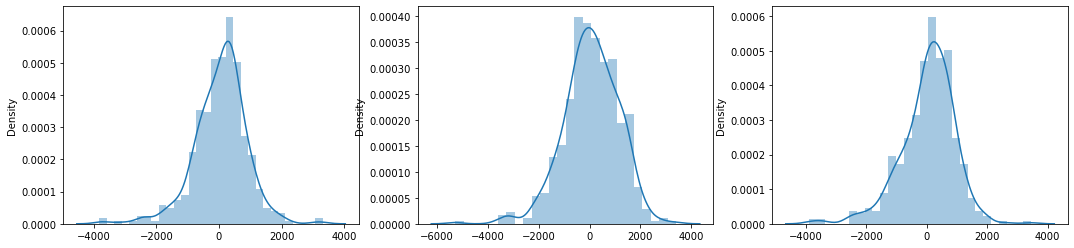

In [113]:
#On Training Data Set
plt.figure (figsize=(18,4))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())

    y = bike_train [y_var]
    X = bike_train [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    y_pred = lr_model.predict (X)
    residuals = y - y_pred

    plt.subplot (1,3,i+1)
    sns.distplot (residuals)
plt.show()

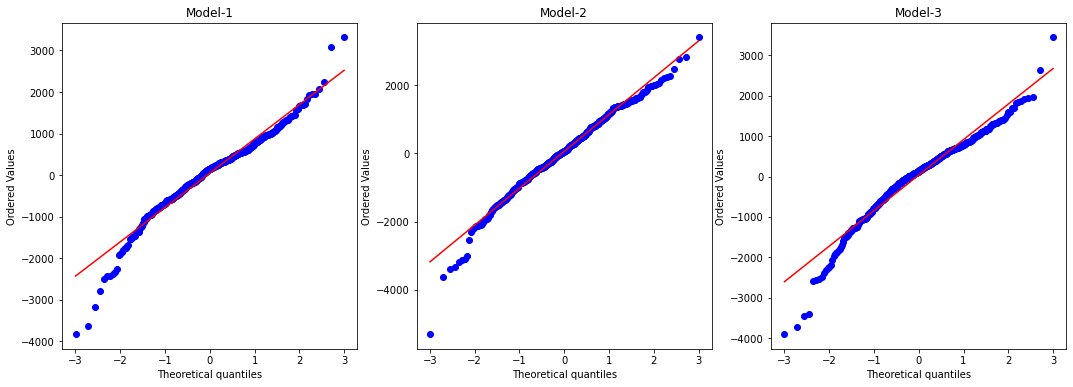

In [122]:
#On Training data set - using Q-Q plot
plt.figure (figsize=(18,6))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_train [y_var]
    X = bike_train [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    ax = plt.subplot (1,3,i+1)
    stats.probplot(lr_model.resid, dist="norm", plot= plt)
    ax.title.set_text ('Model-{}'.format(k))

plt.show()

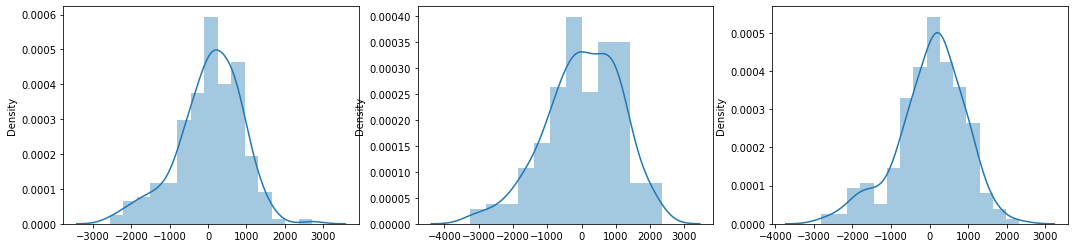

In [114]:
#On Test Data Set
plt.figure (figsize=(18,4))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())

    y = bike_test [y_var]
    X = bike_test [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    y_pred = lr_model.predict (X)
    residuals = y - y_pred

    plt.subplot (1,3,i+1)
    sns.distplot (residuals)
plt.show()

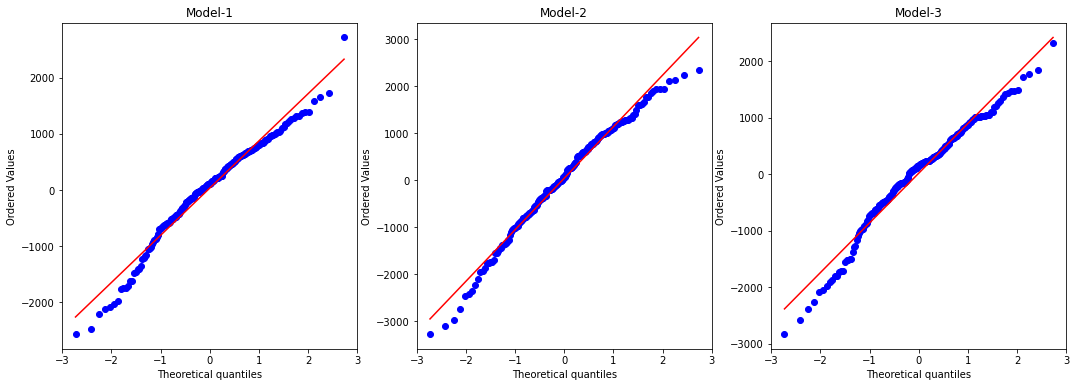

In [129]:
#On Test data set - using Q-Q plot
plt.figure (figsize=(18,6))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_test [y_var]
    X = bike_test [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    ax = plt.subplot (1,3,i+1)
    stats.probplot(lr_model.resid, dist="norm", plot= plt)
    ax.title.set_text ('Model-{}'.format(k))

plt.show()

#### <font color=green> Step 6.2: </font> Residual mean is 0 

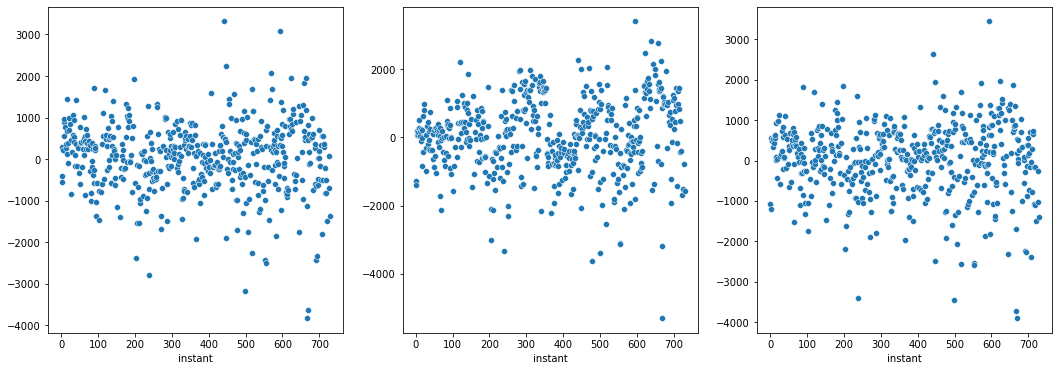

In [112]:
#On Training Data set
plt.figure (figsize=(18,6))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_train [y_var]
    X = bike_train [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    y_pred = lr_model.predict (X)
    residuals = y - y_pred

    plt.subplot (1,3,i+1)
    sns.scatterplot (x=bike_data['instant'], y=residuals)
plt.show()

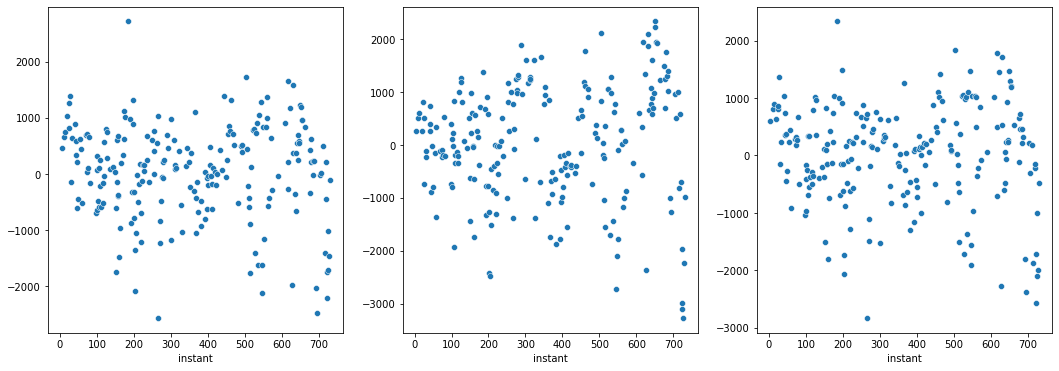

In [115]:
#On Test Data set
plt.figure (figsize=(18,6))
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_test [y_var]
    X = bike_test [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    y_pred = lr_model.predict (X)
    residuals = y - y_pred

    plt.subplot (1,3,i+1)
    sns.scatterplot (x=bike_data['instant'], y=residuals)
plt.show()

#### <font color=green> Step 6.3: </font> Check that the errors are independent. Use Durbin Watson Test
> The Durbin Watson value should be as close to 2 as possible. 

In [116]:
#On Training data set
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_train [y_var]
    X = bike_train [X_vars]

    lr_model = sm_api.OLS (y, X).fit()

    dw_val = statsmodels.stats.stattools.durbin_watson(lr_model.resid)
    
    print ("Durbin Watson value of model {} = {}".format(k, dw_val))

Durbin Watson value of model 1 = 2.0538675157800266
Durbin Watson value of model 2 = 2.0938268097830206
Durbin Watson value of model 3 = 2.0147138540795004


In [117]:
#On Test data set
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())
    
    y = bike_test [y_var]
    X = bike_test [X_vars]

    lr_model = sm_api.OLS (y, X).fit()

    dw_val = statsmodels.stats.stattools.durbin_watson(lr_model.resid)
    
    print ("Durbin Watson value of model {} = {}".format(k, dw_val))

Durbin Watson value of model 1 = 1.9746481544496826
Durbin Watson value of model 2 = 1.9329796259345364
Durbin Watson value of model 3 = 1.9630152352784431


#### <font color=blue> Step 7: </font> Evaluate Models

#### <font color=green> Step 7.1: </font> Compare the R-squared of test and train datasets

In [124]:
for i, k in enumerate (models):
    X_vars = list(models[k][1].keys())

    y = bike_train [y_var]
    X = bike_train [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()
    y_pred = lr_model.predict (X)

    r2_train = r2_score (y_true = y, y_pred = y_pred)

    y = bike_test [y_var]
    X = bike_test [X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()
    y_pred = lr_model.predict (X)
    r2_test = r2_score (y_true = y, y_pred = y_pred)

    print ('model-', (i+1), ':', sorted(models[k][1]))
    print ('Adj-R2=', models[k][0], ', r2_train=', r2_train.round (3), ', rt_test=', r2_test.round (3))
    print ()

model- 1 : ['Aug', 'Sep', 'atemp', 'holiday', 'light snow', 'misty', 'summer', 'winter', 'workingday', 'yr']
Adj-R2= 0.97 , r2_train= 0.814 , rt_test= 0.803

model- 2 : ['atemp', 'workingday', 'yr']
Adj-R2= 0.95 , r2_train= 0.688 , rt_test= 0.67

model- 3 : ['Aug', 'Sep', 'atemp', 'holiday', 'light snow', 'summer', 'winter', 'yr']
Adj-R2= 0.966 , r2_train= 0.788 , rt_test= 0.784



#### <font color=blue> Step 8: </font> Visually compare the models

In [125]:
def display_model (k):
    X_vars = list(models[k][1].keys())

    y = bike_data[y_var]
    X = bike_data[X_vars]
    
    lr_model = sm_api.OLS (y, X).fit()

    lr_dict = dict (round (lr_model.params, 0))
    print (lr_dict)

    y_pred = lr_model.predict (X)
    residuals = y_pred - y

    plt.figure (figsize=(16,12))

    ax1 = plt.subplot (2,2,1)
    y.plot.line()
    y_pred.plot.line()
    ax1.title.set_text ('Actual vs Predicted Count')

    ax2 = plt.subplot (2,2,2)
    sns.scatterplot (x=bike_data['instant'], y=residuals)
    ax2.title.set_text ('Residuals against Time')

    ax3 = plt.subplot (2,2,3)

    y = np.array(y)
    y.sort()

    y_pred = np.array(y_pred)
    y_pred.sort()

    plt.scatter(y, y_pred)
    plt.plot([min(y), max(y)], [min(y), max(y)], color="red")
    plt.xlabel("Actual dataset's quantiles")
    plt.ylabel("Predicted dataset's quantiles")

    ax3.title.set_text ('Q-Q Plot')

    plt.show()

{'yr': 2042.0, 'holiday': -623.0, 'workingday': 134.0, 'atemp': 130.0, 'summer': 794.0, 'winter': 1227.0, 'light snow': -2408.0, 'misty': -677.0, 'Aug': 510.0, 'Sep': 969.0}


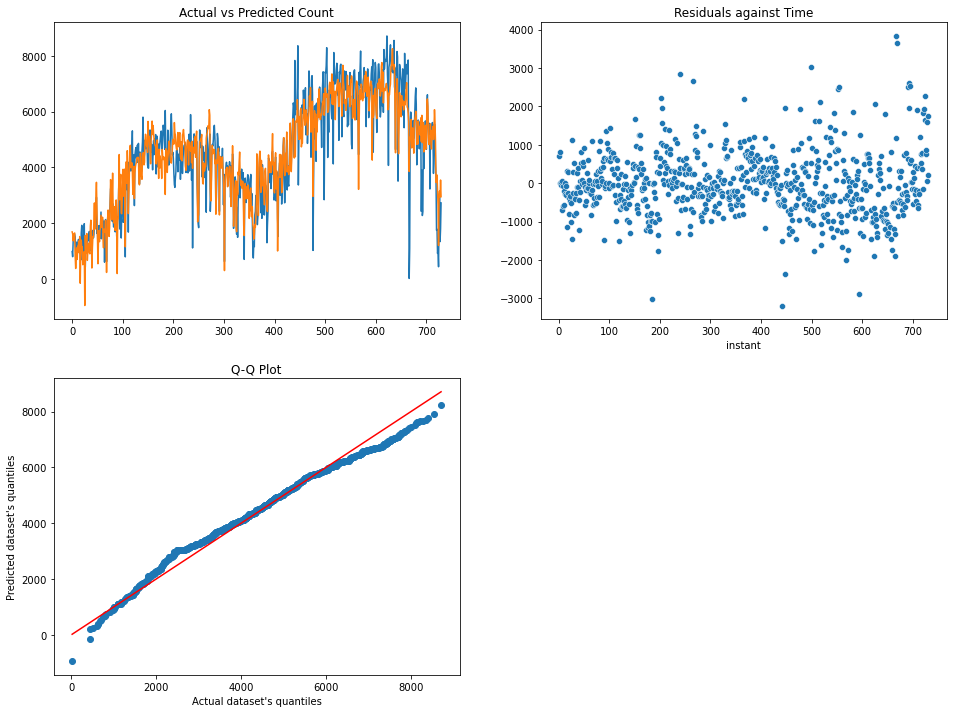

In [126]:
display_model (1)

{'workingday': 126.0, 'yr': 2090.0, 'atemp': 142.0}


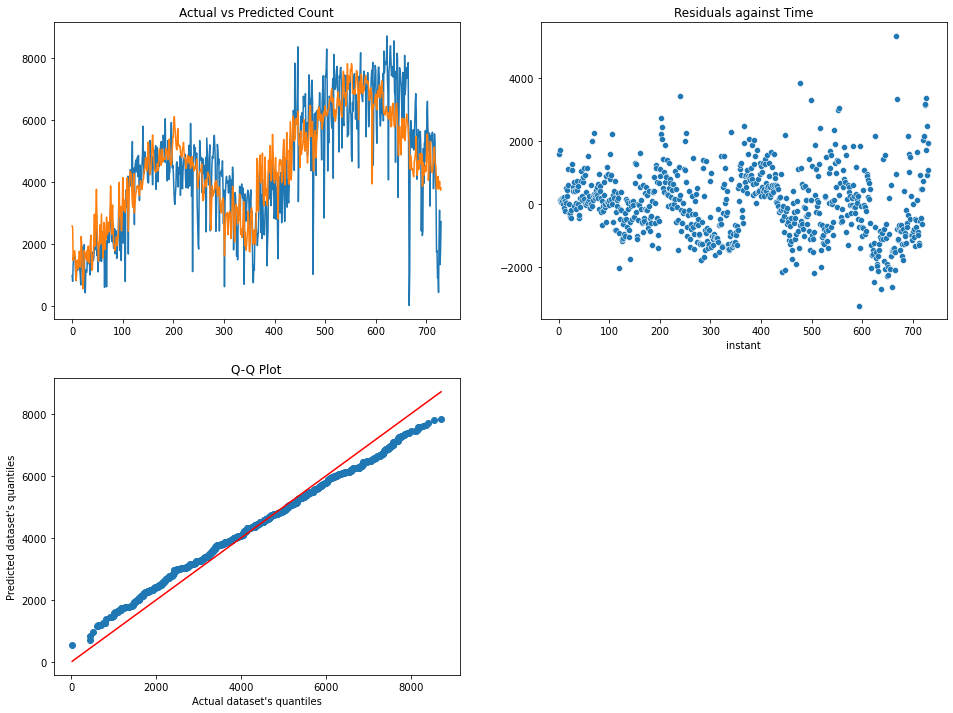

In [127]:
display_model (2)

{'yr': 2013.0, 'holiday': -700.0, 'atemp': 128.0, 'summer': 705.0, 'winter': 1127.0, 'light snow': -2181.0, 'Aug': 486.0, 'Sep': 882.0}


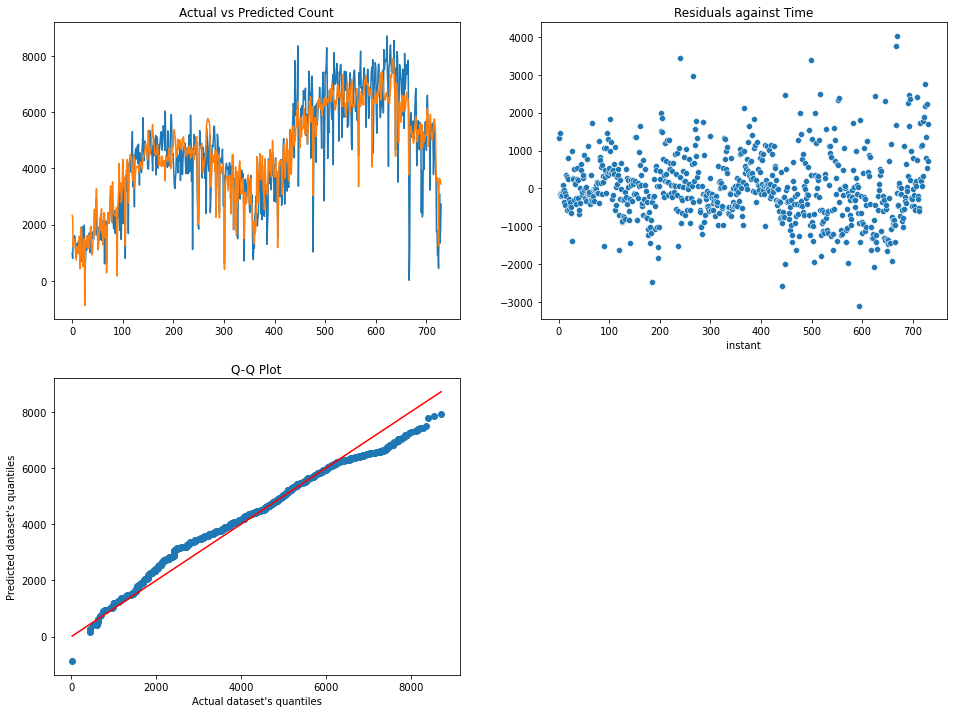

In [128]:
display_model (3)

#### <font color=blue> Step 9: </font> Conclusion and Recommendation

In [130]:
#All 3 models show good results, but overall, model-1 has the best fit
X_vars = list(models[1][1].keys())

y = bike_data[y_var]
X = bike_data[X_vars]

lr_model = sm_api.OLS (y, X).fit()

print (round (lr_model.params, 0))

yr            2042.0
holiday       -623.0
workingday     134.0
atemp          130.0
summer         794.0
winter        1227.0
light snow   -2408.0
misty         -677.0
Aug            510.0
Sep            969.0
dtype: float64


#### <font color=red> Based on the above, we can recommed the following:
> <b> 1. </b> The model is: No. of Rentals = 2042 * yr - 623 * holiday + 134 * workingday + 130 * atemp + 794 * summer + 1227 * winter - 2408 * light-snow - 677 * misty + 510 * Aug + 969 * Sep
> <p> <b> 2. </b> The results of the regression indicated that 7 predictors explained 97% of the variance. These are: year, holiday, working day, feeling temperature, season (summer / winter), weather situation (light snow / misty) and month (Aug / Sep)
> <p> <b> 3. </b> The actual name for the yr column should be not-first-year. Its value should be 1 for every year after 1st year.
> <p> <b> 4. </b> Demand during working days is much more than non working-days
> <p> <b> 5. </b> Demand during clear weather days is more than other weather situations. If the weather is misty, use a value of misty = 1, else misty = 0. If the weather is light-snow, use the value of light-snow = 1, else it is 0
> <p> <b> 6. </b> Demand during higher temperatures is more than during lower temperatures
> <p> <b> 7. </b> Demand during Aug and Sep increases. If the month is Aug, use Aug = 1, else Aug = 0. If the month is Sep, use Sep = 1, else it is 0
> <p> <b> 8. </b> Demand during summer increases. If the season is summer, use summer = 1, else summer = 0.
> <p> <b> 9. </b> Demand during winter decreases. However, the coeeficient for winter is +ve and high. This seems counter-intuitive. But this is much more than offset by -ve value of light-snow, which usually accompanies winter. If the season is winter, use winter = 1, else winter = 0.
> <p> <b> 10. </b> The company should also plan based on the number of registrations, which will likely increase year-on-year
>
> <font color=red> Note: </font> Note that all the above variables can be determined well in advance and hence the company can plan well in advance about the daily demand for bikes